In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

In [2]:
os.chdir("../../")

In [3]:
import src.processing.nlp_preprocess as nlp

D:\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\migue\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\migue\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [4]:
data = pd.read_csv("./data/raw/train.csv")

In [5]:
data.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

In [6]:
data.describe()

toxic   severe_toxic        obscene         threat  \
count  159571.000000  159571.000000  159571.000000  159571.000000   
mean        0.095844       0.009996       0.052948       0.002996   
std         0.294379       0.099477       0.223931       0.054650   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              insult  identity_hate  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

In [7]:
data.count()

id               159571
comment_text     159571
toxic            159571
severe_toxic     159571
obscene          159571
threat           159571
insult           159571
identity_hate    159571
dtype: int64

In [8]:
labels= ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

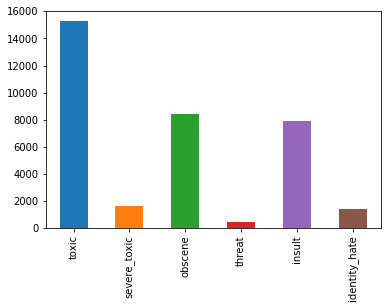

In [9]:
data[labels].sum().plot.bar()

In [10]:
data[labels].groupby(labels,as_index=False).size()

toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0                143346
                                              1                    54
                                      1       0                   301
                                              1                    28
                              1       0       0                    22
                                      1       0                     3
                     1        0       0       0                   317
                                              1                     3
                                      1       0                   181
                                              1                    18
                              1       0       0                     2
                                      1       0                     2
1      0             0        0       0       0                  5666
                              

143346 of the 159571 rows has 0 in all labels so we have a imbalanced dataset in all the labels and when  create the model we will need to adress this problem

We don't have missing values in any attribute, let's look the correlations

In [11]:
corr = data[labels].corr()
corr.style.background_gradient(cmap='coolwarm')

In [12]:
for label in labels:
    display(data[labels].groupby(label).sum())

severe_toxic  obscene  threat  insult  identity_hate
toxic                                                      
0                 0      523      29     533            103
1              1595     7926     449    7344           1302

toxic  obscene  threat  insult  identity_hate
severe_toxic                                               
0             13699     6932     366    6506           1092
1              1595     1517     112    1371            313

toxic  severe_toxic  threat  insult  identity_hate
obscene                                                    
0         7368            78     177    1722            373
1         7926          1517     301    6155           1032

toxic  severe_toxic  obscene  insult  identity_hate
threat                                                     
0       14845          1483     8148    7570           1307
1         449           112      301     307             98

toxic  severe_toxic  obscene  threat  identity_hate
insult                                                     
0        7950           224     2294     171            245
1        7344          1371     6155     307           1160

toxic  severe_toxic  obscene  threat  insult
identity_hate                                              
0              13992          1282     7417     380    6717
1               1302           313     1032      98    1160

as we can see in previous tables when a comment is severe toxic it must be toxic as well, in fact, rarely a comment has any other label without being toxic. So we have six different no exclusive labels to predict.

In [13]:
data["comment_text"].map(lambda x: len(nlp.get_words(x))).plot.hist(bins=100)

KeyboardInterrupt: 

In [ ]:
data["comment_text"].map(lambda x: len(nlp.get_words(x))).describe()

In [ ]:
data["comment_text"].map(lambda x: len(nlp.get_words(x))).sum()

Normally the comments has less than 100 words, but we have one with 1403, let's check this extreme cases

In [ ]:
idmax = data["comment_text"].map(lambda x: len(nlp.get_words(x))).idxmax()
data.loc[idmax,"comment_text"]

In [ ]:
data.loc[idmax,labels]

it's a valid comment, really toxic but a ok example. Since this data comes from a competition looks like we don't have many problem with outliers, incorrect examples and missing values